# Parrot_2020Fall_LinearRegressionWithPython_practice

## Loading Data and Libraries

In [1]:
#Import the libraries we need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Import the example data we need

from sklearn.datasets import load_boston
boston_dataset = load_boston()

## Data Exploration

In [3]:
# Let's see what kind of data we have

print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
boston_dataset

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
print(boston_dataset.DESCR)

## Let's choose "MEDV" as a TARGET variable we predict
## The other variables will be used as features which are independent variables

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
## Cleaning Dataset

boston.isnull().any()
#boston = boston.fillna(method='ffill') if there is any TRUE 

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

In [7]:
boston.shape
# 506 Rows and 13 Columns

(506, 13)

In [8]:
#Summary
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
boston['MEDV']= boston_dataset.target

## We gonna take 'MEDV' which are median values of house prices as a target value we predict

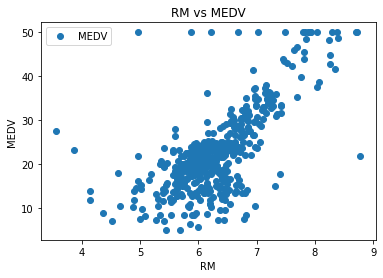

In [10]:
# Let's plot one feature(Room) with MEDV to see any relationship

boston.plot(x='RM', y='MEDV', style= 'o')
plt.title('RM vs MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

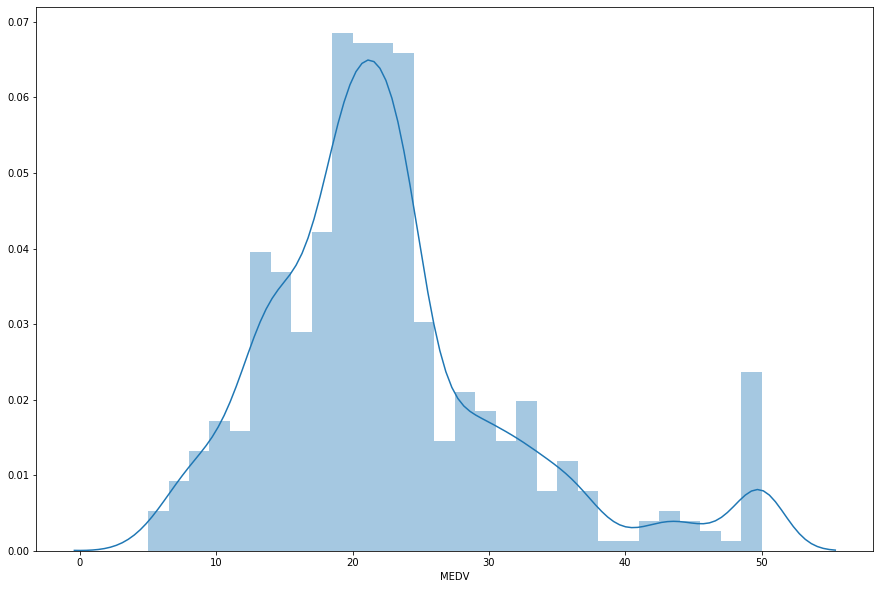

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(boston['MEDV'], bins=30)
plt.show()

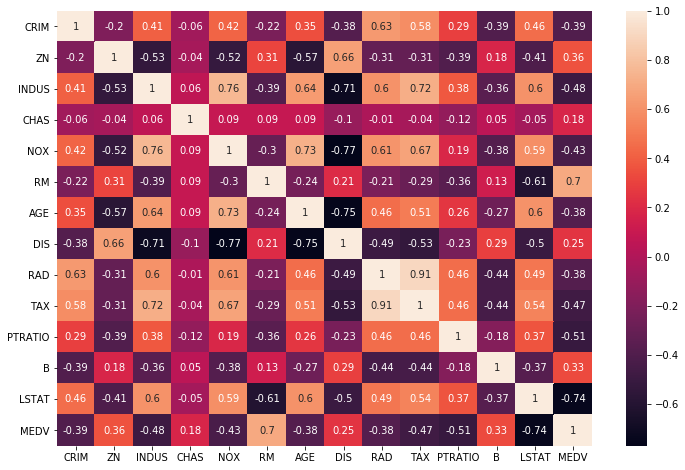

In [ ]:
plt.figure(figsize=(12,8))
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

## Modeling

In [11]:
X = boston[['RM']].values
Y = boston['MEDV'].values

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=123123)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 1)
(102, 1)
(404,)
(102,)


In [16]:
Y_train

array([17.9, 18.8, 20.6, 13.8, 22.2, 25. , 50. , 32.9, 14.9, 22.2, 21.9,
       15.6, 30.5, 36.1, 17.5,  7.5, 23.8, 24.8, 32.5,  8.1, 21.8, 27.5,
       13.6, 11.9, 16.1, 22. , 15.1, 23.1, 19.2, 21.7, 11.7, 27.1, 24.8,
       19.5, 19.4, 20.5, 20.4, 13.8, 24.4, 27.9, 21.7, 13.4, 17.2, 22.6,
       32.7, 22.7, 29. , 17.5, 26.7, 14.2, 11. , 17.2, 23.1, 17.4, 15. ,
       17.3, 20.6, 10.5, 24.7, 15.6, 27.5, 18.5, 50. , 21.5, 12.1, 13.6,
       29.8, 19.5, 30.7, 17.8, 12.8, 15.2, 23.3, 23.8, 23.8, 10.9, 13.5,
       13.1, 13.8, 39.8, 24.5, 50. , 25.1, 46.7, 28.4, 21.2, 19.6, 19.3,
       15. , 22.5, 19.1, 15.3, 34.9, 33.4, 22.3, 10.2, 17.1, 22. , 18.7,
       25. , 24.2, 12. , 21. , 16.3, 21.2, 11.7, 21.7, 25.3, 23.1, 18.4,
       16. , 28.4, 29.8, 17.1, 24. , 18.2,  7. , 20.6, 23.2, 23. , 50. ,
       10.4,  9.5, 50. , 15.4, 22.8, 20.6, 19.3, 23.9, 24.8, 19.9, 26.6,
       20.7, 18.4, 16.4, 23.8, 23. , 15.6, 20.1, 24.5, 14.1, 21. , 20. ,
       10.9, 21.2, 20.4, 24.4, 22.3, 14.6, 18.5, 19

In [ ]:
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()
## linear_model : y = a + b*X 
linear_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = linear_model.predict(X_test)

In [ ]:
ans = pd.DataFrame({'Actual': Y_test, 'Predicted':y_pred})
ans.head(50)

,Actual,Predicted
0,19.0,19.666871
1,31.0,31.329255
2,24.1,21.448035
3,19.4,16.698264
4,11.9,4.281007
5,24.7,23.322498
6,44.8,39.293602
7,35.4,28.284312
8,10.2,21.965421
9,22.2,21.100284


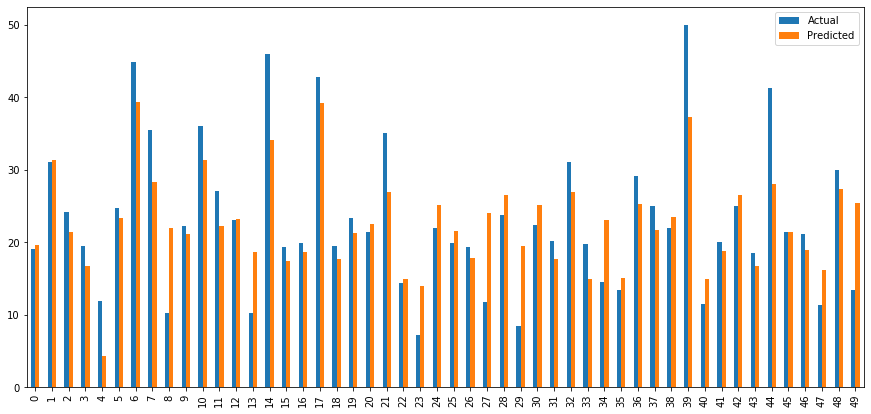

In [ ]:
ans.head(50).plot(kind='bar', figsize=(15,7))
plt.show()

## Evaluate Model

In [ ]:
print("Test set")
print('Mean Squared Error :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test set
Mean Squared Error : 43.24493214644142
Root Mean Squared Error : 6.5760879059241155


In [ ]:
print("Train Set")
train_pred = linear_model.predict(X_train)
print("Mean Squared Error :", metrics.mean_squared_error(Y_train, train_pred))
print("Root Mean Squared Error :", np.sqrt(metrics.mean_squared_error(Y_train, train_pred)))



Train Set
Mean Squared Error : 43.930326741177616
Root Mean Squared Error : 6.627995680534019


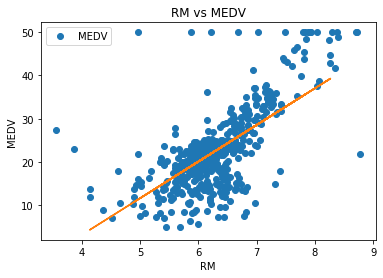

In [ ]:
boston.plot(x='RM', y='MEDV', style= 'o')
plt.plot(X_test,y_pred)
plt.title('RM vs MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()